In [1]:
import pandas as pd
import numpy as np
import random
import math

import requests

#Herramientas geo
import geopandas as gpd
from shapely.geometry import Point
from geopy.distance import distance
from geopy.distance import geodesic
import folium
from folium import Choropleth, Marker, GeoJson
from folium.plugins import HeatMap, MarkerCluster

#Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# AIRBNB

In [2]:
abnb = pd.read_csv("listings.csv")
abnb.shape

(25087, 18)

In [3]:
abnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1044679652057774327,Jubilee park home,378158616,Lucky,NaN,Maroondah,-37.822658,145.228506,Entire home/apt,NaN,3,0,NaN,NaN,2,0,0,NaN
1,1036489765594430755,Lovely Ringwood Studio w/ Ensuite,551026724,Rovern,NaN,Maroondah,-37.810347,145.254256,Private room,45.0,2,3,2024-02-15,1.27,10,284,3,NaN
2,38971182,Furnished accomodation,298550539,Amit,NaN,Boroondara,-37.821940,145.023180,Private room,40.0,13,0,NaN,NaN,1,90,0,NaN
3,572431386115618941,Selina St Kilda - Bed in 4-Bed Dormitory Room,446636199,Selina,NaN,Port Phillip,-37.859820,144.977440,Shared room,123.0,1,30,2024-02-17,1.21,8,352,9,NaN
4,28139568,Close to Monash Caulfield Short lease!!!,212558156,Xiaoxiao,NaN,Stonnington,-37.847940,144.989430,Private room,NaN,70,0,NaN,NaN,1,0,0,NaN


In [4]:
abnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25087 entries, 0 to 25086
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              25087 non-null  int64  
 1   name                            25087 non-null  object 
 2   host_id                         25087 non-null  int64  
 3   host_name                       25085 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   25087 non-null  object 
 6   latitude                        25087 non-null  float64
 7   longitude                       25087 non-null  float64
 8   room_type                       25087 non-null  object 
 9   price                           17899 non-null  float64
 10  minimum_nights                  25087 non-null  int64  
 11  number_of_reviews               25087 non-null  int64  
 12  last_review                     

In [5]:
abnb.describe().T

,count,mean,std,min,25%,50%,75%,max
id,25087.0,4.535538e+17,4.577187e+17,10803.000000,2.699404e+07,5.714442e+17,9.141352e+17,1.112688e+18
host_id,25087.0,1.767668e+08,1.717223e+08,9082.000000,3.325620e+07,1.083342e+08,2.959552e+08,5.670139e+08
neighbourhood_group,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,25087.0,-3.782820e+01,7.582749e-02,-38.225690,-3.785385e+01,-3.781903e+01,-3.780174e+01,-3.744425e+01
longitude,25087.0,1.450119e+02,1.492872e-01,144.492156,1.449561e+02,1.449768e+02,1.450223e+02,1.458450e+02
price,17899.0,2.850732e+02,1.076014e+03,16.000000,1.350000e+02,2.050000e+02,3.090000e+02,1.049830e+05
minimum_nights,25087.0,4.888588e+00,2.579494e+01,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,1.124000e+03
number_of_reviews,25087.0,3.181963e+01,6.315760e+01,0.000000,1.000000e+00,8.000000e+00,3.300000e+01,1.533000e+03
reviews_per_month,20341.0,1.430318e+00,1.631802e+00,0.010000,2.900000e-01,9.900000e-01,2.010000e+00,5.304000e+01
calculated_host_listings_count,25087.0,1.875860e+01,5.326263e+01,1.000000,1.000000e+00,2.000000e+00,9.000000e+00,3.390000e+02


In [6]:
#Límites de barrios

barrios_airbnb = gpd.read_file("neighbourhoods.geojson")
barrios_airbnb.head()

,neighbourhood,neighbourhood_group,geometry
0,Greater Dandenong,None,"MULTIPOLYGON (((145.14171 -37.93137, 145.14255..."
1,Wyndham,None,"MULTIPOLYGON (((144.82749 -37.82279, 144.82654..."
2,Hume,None,"MULTIPOLYGON (((144.67239 -37.56778, 144.67128..."
3,Hobsons Bay,None,"MULTIPOLYGON (((144.90276 -37.84706, 144.90340..."
4,Kingston,None,"MULTIPOLYGON (((145.14171 -37.93137, 145.14190..."


In [7]:
barrios_airbnb.shape

(30, 3)

<Axes: >

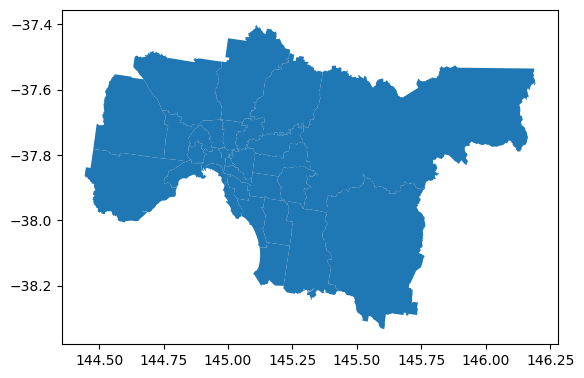

In [8]:
barrios_airbnb.plot()

## Ingenieria de atributos

Vamos a incorporar tratar de generar nuevos atributos

In [9]:
#Crep una variable de identificación de los alquileres temporales (menores a un mes)
abnb['alquiler_temporal'] = (abnb.minimum_nights > 0) & (abnb.minimum_nights <= 28)

In [10]:
abnb['alquiler_temporal'].value_counts()

alquiler_temporal
True     24632
False      455
Name: count, dtype: int64

In [11]:
pd.set_option("max_colwidth", 100)
abnb.name

0                                         Jubilee park home
1                         Lovely Ringwood Studio w/ Ensuite
2                                    Furnished accomodation
3             Selina St Kilda - Bed in 4-Bed Dormitory Room
4                  Close to Monash Caulfield Short lease!!!
                                ...                        
25082         67floor Skyview 2BR 3beds for 6 centre of CBD
25083                           Brand New 3 Level Townhouse
25084     Luxe & Modern in heart of Sth Yarra- FREE Parking
25085    Welcome to the 19th Century THE GEORGE'  APARTMENT
25086    Claremont Comfort—Sophisticated Yarra River Locale
Name: name, Length: 25087, dtype: object

In [12]:
# #Identifico los monoambientes
# def id_monoambientes(nombre):
#     if '1 bedroom' in nombre.lower():
#         return 'Monoambiente'
#     else:
#         return 'Varios ambientes'

# abnb['monoambiente'] = abnb['name'].apply(id_monoambientes)
# abnb['monoambiente'].value_counts()

In [13]:
abnb['price'].isna().sum()

7188

In [14]:
abnb[abnb['price'].isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,alquiler_temporal
0,1044679652057774327,Jubilee park home,378158616,Lucky,NaN,Maroondah,-37.822658,145.228506,Entire home/apt,NaN,3,0,NaN,NaN,2,0,0,NaN,True
4,28139568,Close to Monash Caulfield Short lease!!!,212558156,Xiaoxiao,NaN,Stonnington,-37.847940,144.989430,Private room,NaN,70,0,NaN,NaN,1,0,0,NaN,False
5,33497686,我,252297574,Shirley,NaN,Monash,-37.887830,145.133840,Private room,NaN,365,0,NaN,NaN,1,0,0,NaN,False
6,29601425,Short term stay for 3 weeks in CBD,173903823,Evedeved,NaN,Melbourne,-37.814980,144.953390,Shared room,NaN,20,0,NaN,NaN,2,0,0,NaN,True
7,22297354,树德民宿,130124314,晓斌,NaN,Wyndham,-37.870580,144.689370,Private room,NaN,1,0,NaN,NaN,1,0,0,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25074,11150157,A Classic Weatherboard Home,57974749,Eleanor,NaN,Whitehorse,-37.852190,145.136810,Entire home/apt,NaN,2,0,NaN,NaN,1,0,0,NaN,True
25079,12989932,Great Location in Prahran,23505876,Margaret,NaN,Stonnington,-37.849300,144.987780,Private room,NaN,1,0,NaN,NaN,1,0,0,NaN,True
25080,13102169,Queensize bed in Brunswick East next to tram stop,72806452,Vishnu,NaN,Moreland,-37.766490,144.973300,Private room,NaN,1,2,2016-07-19,0.02,1,0,0,NaN,True
25083,13865317,Brand New 3 Level Townhouse,81961829,Karen,NaN,Whitehorse,-37.818330,145.141390,Private room,NaN,1,0,NaN,NaN,1,0,0,NaN,True


In [15]:
abnb.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [16]:
abnb = abnb.loc[abnb['room_type'].isin(['Entire home/apt', 'Private room', 'Shared room'])]

# Elimino las columnas vacías

abnb.dropna(axis=1, how="all",inplace=True)
abnb.shape

(25027, 17)

## EDA

In [17]:
abnb.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,alquiler_temporal
0,1044679652057774327,Jubilee park home,378158616,Lucky,Maroondah,-37.822658,145.228506,Entire home/apt,NaN,3,0,NaN,NaN,2,0,0,True
1,1036489765594430755,Lovely Ringwood Studio w/ Ensuite,551026724,Rovern,Maroondah,-37.810347,145.254256,Private room,45.0,2,3,2024-02-15,1.27,10,284,3,True
2,38971182,Furnished accomodation,298550539,Amit,Boroondara,-37.821940,145.023180,Private room,40.0,13,0,NaN,NaN,1,90,0,True
3,572431386115618941,Selina St Kilda - Bed in 4-Bed Dormitory Room,446636199,Selina,Port Phillip,-37.859820,144.977440,Shared room,123.0,1,30,2024-02-17,1.21,8,352,9,True
4,28139568,Close to Monash Caulfield Short lease!!!,212558156,Xiaoxiao,Stonnington,-37.847940,144.989430,Private room,NaN,70,0,NaN,NaN,1,0,0,False


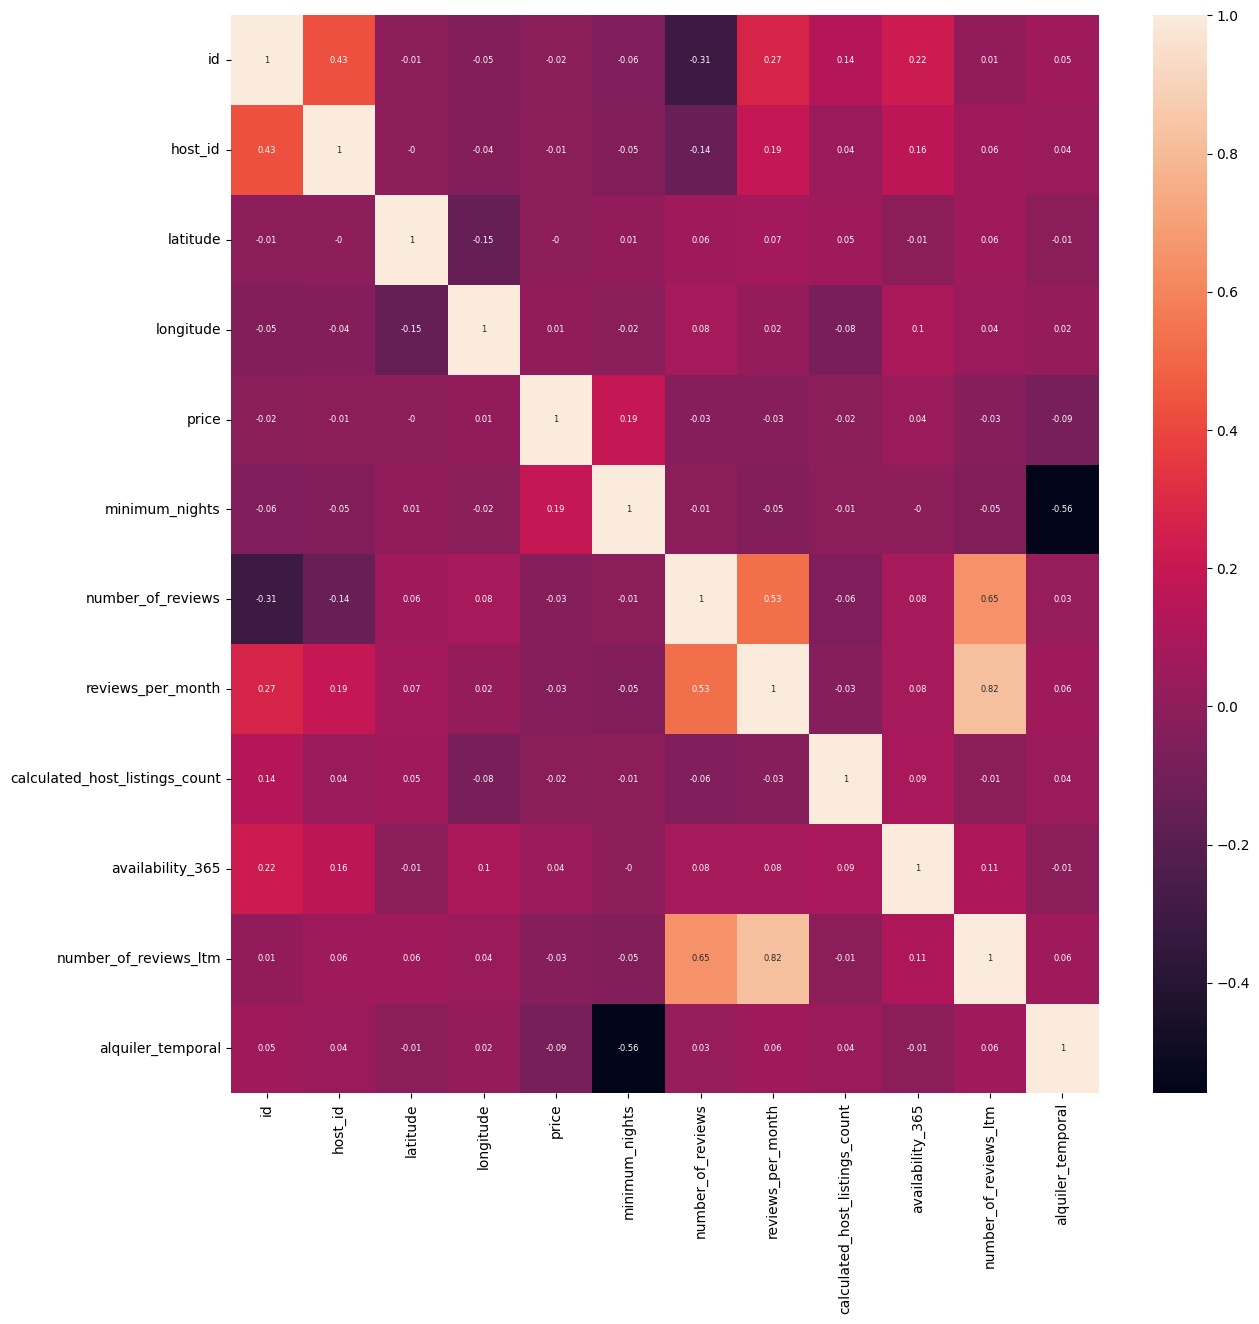

In [18]:
#Genero una matriz decorrelaciones para analizar a simple vista las interacciones entre variables
fig, ax = plt.subplots(figsize=(14,14))

sns.heatmap(round(abnb.corr(numeric_only= True),2),
            annot=True,annot_kws={'size': 6},
            ax=ax)

# plt.savefig('Figura 0: Matriz de correlaciones.png', dpi=fig.dpi)
plt.show()

In [19]:
temporales = abnb[abnb['alquiler_temporal']]

mh = folium.Map(location=[abnb['latitude'].mean(), abnb['longitude'].mean()], zoom_start=12)
HeatMap(data=temporales[['latitude', 'longitude']], radius=15).add_to(mh)

# mh.save('mapa_calor - Alquileres temporales.html')

mh

In [20]:
abnb.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,alquiler_temporal
0,1044679652057774327,Jubilee park home,378158616,Lucky,Maroondah,-37.822658,145.228506,Entire home/apt,NaN,3,0,NaN,NaN,2,0,0,True
1,1036489765594430755,Lovely Ringwood Studio w/ Ensuite,551026724,Rovern,Maroondah,-37.810347,145.254256,Private room,45.0,2,3,2024-02-15,1.27,10,284,3,True
2,38971182,Furnished accomodation,298550539,Amit,Boroondara,-37.821940,145.023180,Private room,40.0,13,0,NaN,NaN,1,90,0,True
3,572431386115618941,Selina St Kilda - Bed in 4-Bed Dormitory Room,446636199,Selina,Port Phillip,-37.859820,144.977440,Shared room,123.0,1,30,2024-02-17,1.21,8,352,9,True
4,28139568,Close to Monash Caulfield Short lease!!!,212558156,Xiaoxiao,Stonnington,-37.847940,144.989430,Private room,NaN,70,0,NaN,NaN,1,0,0,False


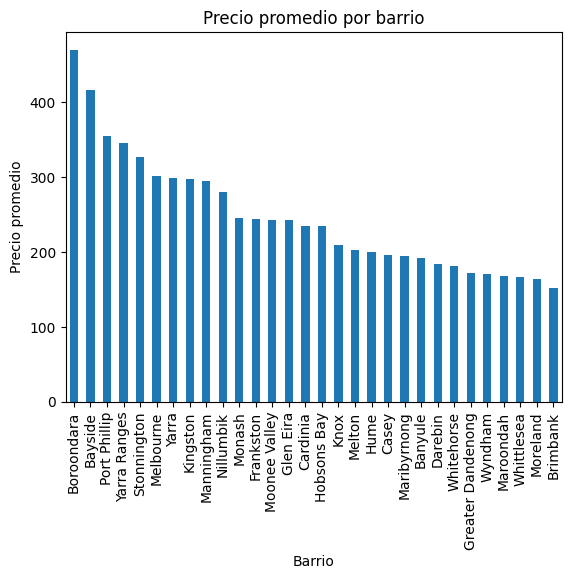

In [21]:
media_precios = abnb[abnb['price'].notna()].groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

# Graficar
ax = media_precios.plot(kind='bar')

# Agregar etiquetas de valor a cada barra
# for i, v in enumerate(media_precios):
#     ax.text(i, v, "$"+str(int(v)), ha='center', va='bottom')

plt.xlabel('Barrio')
plt.ylabel('Precio promedio')
plt.title('Precio promedio por barrio')
plt.show()

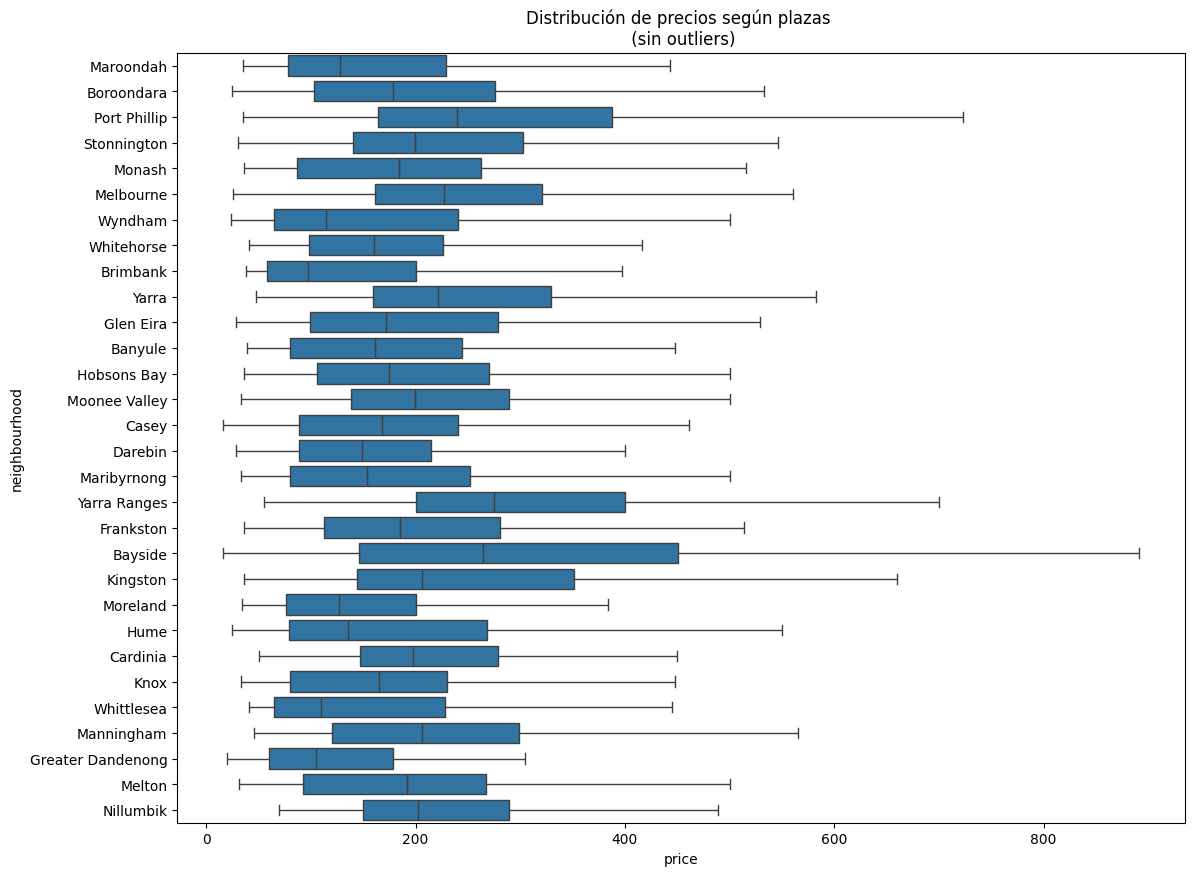

In [22]:
fig, ax = plt.subplots(figsize= [13, 10])
ax = sns.boxplot(x=abnb['price'], y= abnb.neighbourhood.astype(str), showfliers=False, ax=ax).set(title='Distribución de precios según plazas \n (sin outliers)')

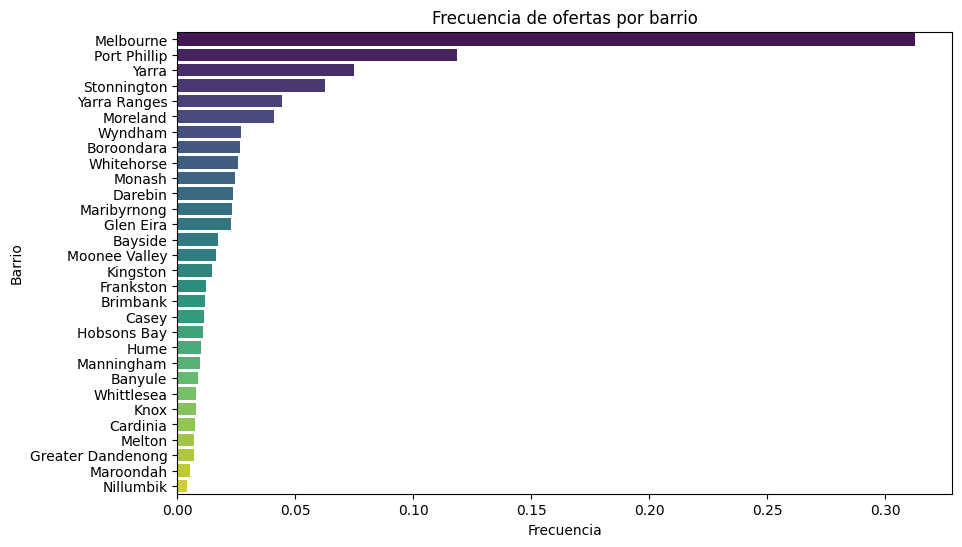

In [23]:
frecuencia_por_barrio = abnb['neighbourhood'].value_counts(normalize=True)

# Crea un gráfico de barras horizontales
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico según tu preferencia
sns.barplot(x=frecuencia_por_barrio.values, y=frecuencia_por_barrio.index, palette='viridis')

# Añade etiquetas y título
plt.xlabel('Frecuencia')
plt.ylabel('Barrio')
plt.title('Frecuencia de ofertas por barrio')

# Muestra el gráfico
plt.show()

In [24]:
abnb['neighbourhood'].unique()

array(['Maroondah', 'Boroondara', 'Port Phillip', 'Stonnington', 'Monash',
       'Melbourne', 'Wyndham', 'Whitehorse', 'Brimbank', 'Yarra',
       'Glen Eira', 'Banyule', 'Hobsons Bay', 'Moonee Valley', 'Casey',
       'Darebin', 'Maribyrnong', 'Yarra Ranges', 'Frankston', 'Bayside',
       'Kingston', 'Moreland', 'Hume', 'Cardinia', 'Knox', 'Whittlesea',
       'Manningham', 'Greater Dandenong', 'Melton', 'Nillumbik'],
      dtype=object)

In [25]:
# Obtener los nombres únicos de los barrios
barrios_unicos = abnb['neighbourhood'].unique()

# Crear un mapa centrado en una ubicación inicial
mapa = folium.Map(location=[abnb['latitude'].mean(), abnb['longitude'].mean()], zoom_start=11)

# Generar colores aleatorios para los barrios
colores_barrios = {barrio: '#{:06x}'.format(random.randint(0, 0xFFFFFF)) for barrio in barrios_unicos}

# Crear un cluster de marcadores
cluster = MarkerCluster().add_to(mapa)

# Iterar sobre las filas del dataframe y agregar marcadores al mapa
for index, row in abnb.iterrows():
    popup_content = f"<b>Barrio:</b> {row['neighbourhood']}<br>" \
                    f"<b>Tipo de vivienda:</b> {row['room_type']}<br>" \
                    f"<b>Precio:</b> ${row['price']}"
    folium.Marker([row['latitude'], row['longitude']],
                  icon=None,
                  popup=popup_content,
                  clustered_marker=True,
                  cluster_id=row['neighbourhood'],
                  ).add_to(cluster)

mapa.save('mapa_nodos.html')

mapa

Output hidden; open in https://colab.research.google.com to view.

## Atributos geo

### Clusters de concentración de publicaciones

In [26]:
from sklearn.cluster import DBSCAN

In [27]:
coords = abnb[['latitude', 'longitude']].values

# Definir el modelo DBSCAN
epsilon = 0.1  # Parámetro epsilon para DBSCAN
min_samples = 5  # Número mínimo de muestras en un cluster
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

# Entrenar el modelo
dbscan.fit(coords)

# Obtener las etiquetas de los clusters asignados por DBSCAN
labels = dbscan.labels_

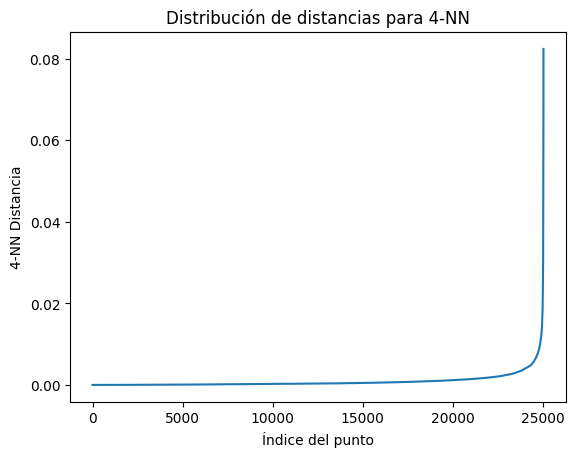

In [28]:
from sklearn.neighbors import NearestNeighbors

# Calcula las distancias utilizando k-NN
k = 4  # Número de vecinos para k-NN
nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(coords)
distances, indices = nbrs.kneighbors(coords)

# Ordena las distancias y grafica el codo
distances = np.sort(distances, axis=0)
distances = distances[:,1]  # Tomar solo las distancias al vecino más cercano (excluyendo el punto en sí mismo)
plt.plot(distances)
plt.xlabel('Índice del punto')
plt.ylabel(f'{k}-NN Distancia')
plt.title(f'Distribución de distancias para {k}-NN')
plt.show()

In [29]:
# import math

# def haversine(lat1, lon1, lat2, lon2):
#     # Radio de la Tierra en metros
#     R = 6371000

#     # Convertir coordenadas de grados a radianes
#     lat1_rad = math.radians(lat1)
#     lon1_rad = math.radians(lon1)
#     lat2_rad = math.radians(lat2)
#     lon2_rad = math.radians(lon2)

#     # Diferencia de latitud y longitud
#     dlat = lat2_rad - lat1_rad
#     dlon = lon2_rad - lon1_rad

#     # Fórmula de Haversine
#     a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2
#     c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
#     distance = R * c

#     return distance

# # Coordenadas
# lat1 = -34.595535
# lon1 = -58.414371
# lat2 = -34.584900
# lon2 = -58.411090

# # Calcular distancia
# distance = haversine(lat1, lon1, lat2, lon2)
# print("Distancia entre los puntos:", distance, "metros")

Ver: https://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/


https://stackoverflow.com/questions/34579213/dbscan-for-clustering-of-geographic-location-data

Cantidad de Clusters: 919
Cantidad de Componentes aislados: 15522 - 62.0 % 


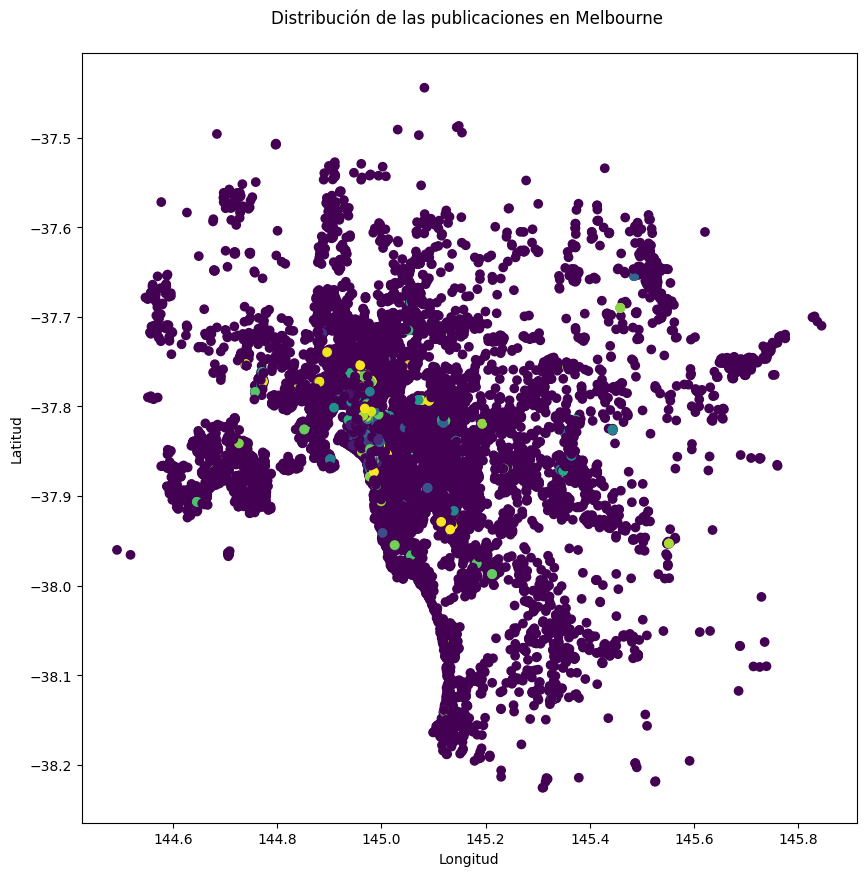

In [30]:
#Defino hiperparámetros del modelo

from geopy import distance

# def mydist(p1, p2):
#   return distance.great_circle((p1[0],p1[1],100),(p2[0],p2[1],100)).meters

kms_per_radian = 6371.0088
E = 2 / kms_per_radian
puntos = 3

#Calculo clusters
abnb['dbscan'] = DBSCAN(eps=E, min_samples=puntos,#metric=mydist
                        ).fit_predict(abnb[['latitude', 'longitude']])
# abnb['dbscan'].value_counts()

#Grafico
fig, ax = plt.subplots(figsize= [10, 10])
ax.scatter(abnb['longitude'], abnb['latitude'], c = abnb['dbscan'])
ax.set_title('Distribución de las publicaciones en Melbourne \n ')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
print(f"Cantidad de Clusters: {abnb.dbscan.nunique()}")
print(f"Cantidad de Componentes aislados: {abnb[abnb['dbscan']==-1].shape[0]} - {round(abnb[abnb['dbscan']==-1].shape[0]/abnb.shape[0] * 100,1)} % ")
plt.show()

In [31]:
# mb['dbscan'] = DBSCAN(eps=E, min_samples=puntos,#metric=mydist
#                         ).predict(mb[['latitude', 'longitude']])

#Genero atributos en la base de Propiedades de Melbourne

In [32]:
crs_proyectado = 'EPSG:4203'

In [33]:
#Cargo la base de casasde Melbourne
mb = pd.read_csv('Melbourne housing prices.csv')
mb.shape

(13580, 21)

In [34]:
#Convierto en geodataframe e asigno barrio usando geojson de barrios de airbnb
mb = gpd.GeoDataFrame(mb,geometry=gpd.points_from_xy(x=mb.Longitude, y=mb.Latitude), crs=crs_proyectado)
mb = gpd.sjoin(mb, barrios_airbnb[['neighbourhood','geometry']].to_crs(crs_proyectado),predicate='intersects', how="left", op="within")
mb[['geometry','neighbourhood','CouncilArea']].sample(10)

,geometry,neighbourhood,CouncilArea
10268,POINT (144.96200 -37.70145),Moreland,Moreland
10284,POINT (145.10381 -38.16121),Frankston,Frankston
2892,POINT (144.93260 -37.69740),Moreland,Moreland
5894,POINT (144.91280 -37.73540),Moonee Valley,Moonee Valley
6691,POINT (144.88850 -37.81020),Maribyrnong,Maribyrnong
6395,POINT (145.00640 -37.84700),Stonnington,Stonnington
10301,POINT (144.92291 -37.70917),Moreland,Moreland
3715,POINT (144.87450 -37.78320),Maribyrnong,Maribyrnong
1596,POINT (145.05780 -37.84420),Boroondara,Boroondara
10641,POINT (144.76656 -37.79571),Brimbank,Brimbank


In [35]:
mb.shape

(13580, 24)

In [36]:
print(f"Casos faltantes en barrio \n Var original:{mb['CouncilArea'].isna().sum()} \n Var Airbnb:{mb['neighbourhood'].isna().sum()}")
mb['Barrio'] = mb['neighbourhood'].fillna(mb['CouncilArea'])
print(f"Casos sin barrio (VF):{mb['Barrio'].isna().sum()}")

Casos faltantes en barrio 
 Var original:1369 
 Var Airbnb:17
Casos sin barrio (VF):5


In [37]:
from shapely.geometry import Point
from geopy.distance import distance

radio_buffer = 500 / (111.32 * 1000)  # 111.32 km es la longitud aproximada de un grado de latitud

#Creo un buffer que contenga la cantidad de publicaciones de airbnb
mb['buffers'] = mb.to_crs(crs_proyectado).geometry.buffer(radio_buffer)

In [38]:
#Vemos como quedan los buffers -

prueba = mb.iloc[0:100]
m = folium.Map(location=[prueba.geometry.y.mean(), prueba.geometry.x.mean()], zoom_start=10)

# Iterar sobre cada fila del GeoDataFrame
for idx, row in prueba.iterrows():
    # Agregar el punto al mapa
    folium.Marker(location=[row.geometry.y, row.geometry.x]).add_to(m)
    folium.Marker(location=[row.geometry.y, row.geometry.x]).add_to(m)

    # Agregar el buffer al mapa con cierta transparencia
    folium.GeoJson(row.buffers.__geo_interface__,
                   style_function=lambda x: {'fillColor': '#3186cc', 'color': '#3186cc', 'weight': 1, 'fillOpacity': 0.3}
                  ).add_to(m)

# Mostrar el mapa
m

In [44]:
%%time
radio_buffer = 500 / (111.32 * 1000)  # 111.32 km es la longitud aproximada de un grado de latitud

#Creo un buffer que contenga la cantidad de publicaciones de airbnb
mb['buffers'] = mb.to_crs(crs_proyectado).geometry.buffer(radio_buffer)
abnb = gpd.GeoDataFrame(abnb,geometry=gpd.points_from_xy(x=abnb.longitude, y=abnb.latitude), crs=crs_proyectado)

def contar_publicaciones(buffer, publicaciones):
    return sum(buffer.intersects(geo) for geo in publicaciones.geometry)

mb['abnb_5'] = mb['buffers'].apply(lambda x: contar_publicaciones(x, abnb.to_crs(crs_proyectado)))
mb['abnb_5'].value_counts()

CPU times: user 1h 31min 50s, sys: 2min 38s, total: 1h 34min 28s
Wall time: 1h 33min 33s


abnb_5
1      1215
2      1108
0      1058
3       972
4       792
       ... 
182       1
325       1
298       1
263       1
165       1
Name: count, Length: 359, dtype: int64

In [46]:
mb.to_csv("Melbourne housing prices - Buffers airbn.csv")